In [30]:
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime

In [31]:
PATH = 'data/results/'

In [38]:
def strtotime(s): 
    d = datetime.strptime(s, '%H:%M:%S.%f') 
    h = d.hour 
    m = d.minute 
    s = d.second + d.microsecond/1000000 
    return s + 60 * (m + 60 * h)

def fct(filename): 
    with open(filename, 'r') as f: 
        lines = [line[:-1] for line in f.readlines()]
    if len(lines) == 1:
        return float('inf')
    return strtotime(lines[-1]) - strtotime(lines[0])

def timeline(filename):
    with open(filename, 'r') as f:
        lines = [line[:-1] for line in f.readlines()]
    times = []
    for i in range(len(lines)//2):
        t1, t2 = strtotime(lines[2*i]), strtotime(lines[2*i+1])
        times.append((t1, t2))
    return times

def all_fcts(filename):
    times = timeline(filename)
    return [t2-t1 for (t1, t2) in times]

In [39]:
embedding = {}
embedding['H1'] = ['h%i' % i for i in range( 6, 16)]
embedding['H2'] = ['h%i' % i for i in range(16, 26)]
embedding['H3'] = ['h%i' % i for i in range(26, 36)]
embedding['H4'] = ['h%i' % i for i in range(36, 46)]
colors = {}
colors['H1'] = 'blue'
colors['H2'] = 'red'
colors['H3'] = 'green'
colors['H4'] = 'magenta'

/usr/local/lib64/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


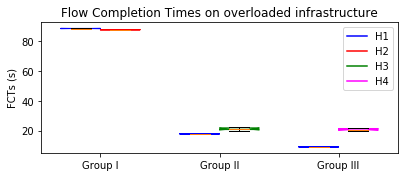

In [40]:
fcts = {}
fcts['G1/L'] = [fct(PATH + 'h%i.out' % h) for h in [6, 7, 8, 9]]
fcts['G1/R'] = [fct(PATH + 'h%i.out' % h) for h in range(16, 26)]
fcts['G2/L'] = [fct(PATH + 'h%i.out' % h) for h in [10, 11, 12]]
fcts['G2/R'] = [fct(PATH + 'h%i.out' % h) for h in range(26, 36)]
fcts['G3/L'] = [fct(PATH + 'h%i.out' % h) for h in [13, 14, 15]]
fcts['G3/R'] = [fct(PATH + 'h%i.out' % h) for h in range(36, 46)]

colours = ['blue', 'red', 'blue', 'green', 'blue', 'magenta']
fig = plt.figure(figsize=[6.4, 2.4])
bplot = plt.boxplot(fcts.values(), notch=True, positions=[0.5, 1, 2, 2.5, 3.5, 4], showfliers=False)
for patch, colour in zip(bplot['boxes'], colours):
    patch.set_color(colour)
    
plt.plot([], [], color='blue', label='H1')
plt.plot([], [], color='red', label='H2')
plt.plot([], [], color='green', label='H3')
plt.plot([], [], color='magenta', label='H4')

plt.xticks([0.75, 2.25, 3.75], ['Group I', 'Group II', 'Group III'])
plt.ylabel("FCTs (s)"); plt.title("Flow Completion Times on overloaded infrastructure")
plt.legend()
plt.show()
fig.savefig(PATH + "fcts.png")

In [41]:
fcts

{'G1/L': [88.73200000000361,
  88.53699999999662,
  88.49199999999837,
  88.60099999999511],
 'G1/R': [87.76900000000023,
  87.75,
  87.77300000000105,
  87.77100000000064,
  87.7699999999968,
  87.7589999999982,
  87.76600000000326,
  87.78399999999965,
  87.76299999999901,
  87.76499999999942],
 'G2/L': [17.830000000001746, 17.83600000000297, 17.822000000000116],
 'G2/R': [21.002000000000407,
  20.03399999999965,
  20.986000000004424,
  21.999000000003434,
  20.639999999999418,
  22.739000000001397,
  22.4800000000032,
  21.497999999999593,
  20.851000000002387,
  20.08600000000297],
 'G3/L': [9.080000000001746, 9.080999999998312, 9.078999999997905],
 'G3/R': [20.959999999999127,
  19.705999999998312,
  20.525000000001455,
  20.527000000001863,
  21.58299999999872,
  20.330999999998312,
  21.93499999999767,
  21.93499999999767,
  20.95900000000256,
  20.506000000001222]}

In [15]:
def get_data(filename):
    with open(filename, 'r') as f:
        raw = f.read()
    return json.loads(raw)

def clean_extremes(data, inf=5, sup=95):
    dinf = np.percentile(data, inf)
    dsup = np.percentile(data, sup)
    data = [d for d in data if d >= dinf and d <= dsup]
    return data

def relative_errors(data):
    rel = [abs(data['rtds'][i]-data['rtds_'][i])/data['rtds_'][i]*100 for i in range(len(data['rtds']))]
    return rel

6464
6447
6446
6456
2673
2589
2674
1448
1449
1436
6660
6661
6658
6667
6658
6665
6689
6668
6666
6656
6822
6772
6847
6827
6803
6827
6841
6831
6825
6796
6877
6819
6812
6860
6864
6854
6844
6873
6848
6808


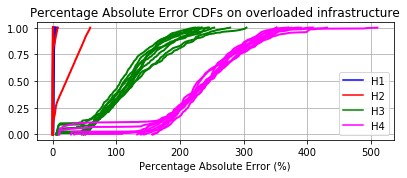

In [42]:
fig = plt.figure(figsize=[6.4, 2.4])

for host in embedding:
    plt.plot([], [], color=colors[host], label=host)
    for h in embedding[host]:
        data = get_data(PATH + 's1-et%s--%s-eth0' % (h, h))
        rel = relative_errors(data)
        rel_clean = clean_extremes(rel)
        print(len(rel_clean))
        p = plt.plot(sorted(rel_clean), np.arange(len(rel_clean))/len(rel_clean), linewidth=2, color=colors[host])

plt.grid()
plt.legend(loc='lower right')
plt.xlabel("Percentage Absolute Error (%)"); plt.title("Percentage Absolute Error CDFs on overloaded infrastructure")
# plt.xscale('log')
plt.subplots_adjust(bottom=0.20)
plt.savefig(PATH + "cdfs_pae.png")
plt.show()